In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

#### Step 1: Loading the Dataset

In [27]:
def load_data(filepath):
    df= pd.read_csv(filepath)
    return df

In [28]:
df = load_data("Mall_customers.csv")

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 2: Dataset Information and Initial Exploration

The **Mall Customers** dataset contains information about 200 customers from a shopping mall, with 5 features. Below is a summary of the columns:

1. **CustomerID**: Unique identifier for each customer (integer).
2. **Gender**: The gender of the customer (categorical: Male/Female).
3. **Age**: Age of the customer (integer).
4. **Annual Income (k$)**: The annual income of the customer in thousands of dollars (integer).
5. **Spending Score (1-100)**: A score assigned by the mall based on customer behavior and spending nature (integer).

The dataset has no missing values, and the data types are as follows:

| Column                  | Non-Null Count | Data Type |
|-------------------------|----------------|------------|
| CustomerID              | 200            | int64      |
| Gender                  | 200            | object     |
| Age                     | 200            | int64      |
| Annual Income (k$)      | 200            | int64      |
| Spending Score (1-100)  | 200            | int64      |

#### Preview of the Dataset
Below are the first few rows of the dataset:

| CustomerID | Gender | Age | Annual Income (k$) | Spending Score (1-100) |
|------------|--------|-----|--------------------|------------------------|
| 1          | Male   | 19  | 15                 | 39                     |
| 2          | Male   | 21  | 15                 | 81                     |
| 3          | Female | 20  | 16                 | 6                      |
| 4          | Female | 23  | 16                 | 77                     |
| 5          | Female | 31  | 17                 | 40                     |

From this initial exploration, we notice:
- There are no missing values.
- The **CustomerID** column is not needed for clustering analysis.
- The columns **Annual Income (k$)** and **Spending Score (1-100)** are potential features for clustering.


In [6]:
data = df.iloc[:, [3,4]] # Working with just the "Annual Income (k$)" and "Spending Score" columns
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

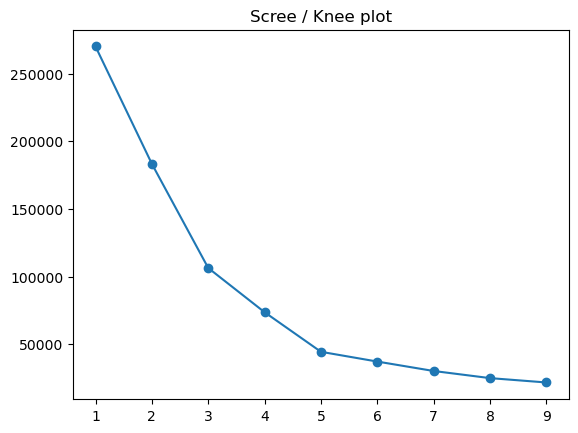

In [8]:
wcss = []
for i in range (1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss, marker = 'o')
plt.title('Scree / Knee plot')
plt.show()

In [9]:
wcss

[269981.28,
 183257.8615446178,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30273.394312070042,
 25012.91706988548,
 21794.8856090982]

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++')
labels = kmeans.fit_predict(data)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [15]:
df['clusters'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [16]:
centriods = kmeans.cluster_centers_
centriods

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

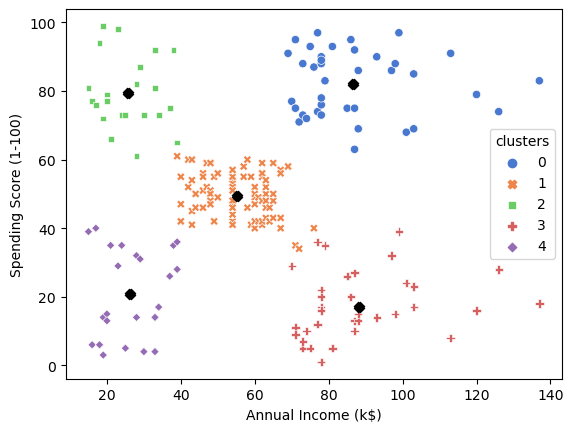

In [19]:
import seaborn as sns
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "clusters", palette = "muted", style= "clusters")
plt.scatter(centriods[:,0], centriods[:, 1], marker = "x", s =25, linewidth =5, c = "black" );

In [22]:
df[df["clusters"] == 0].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0


### Agglomerative Clusttering

In [30]:
dataset = load_data("Mall_customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df1 = dataset.iloc[:, [3,4]].values
df1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

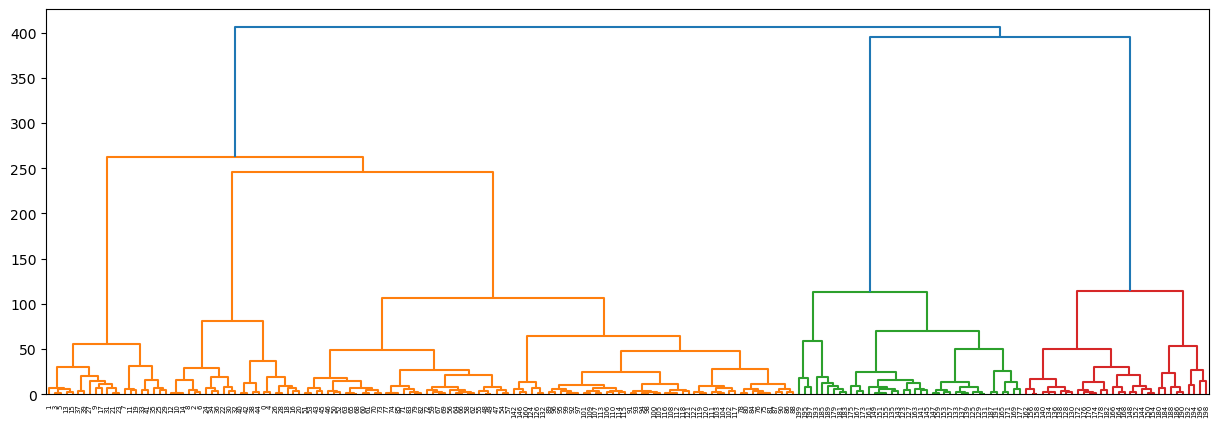

In [53]:
Z = linkage(df1, "ward")
fig = plt.figure(figsize = (15,5))
dn = dendrogram(Z)

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5)
y_pred = cluster.fit_predict(df1)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [47]:
dataset["clusters"] = y_pred
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

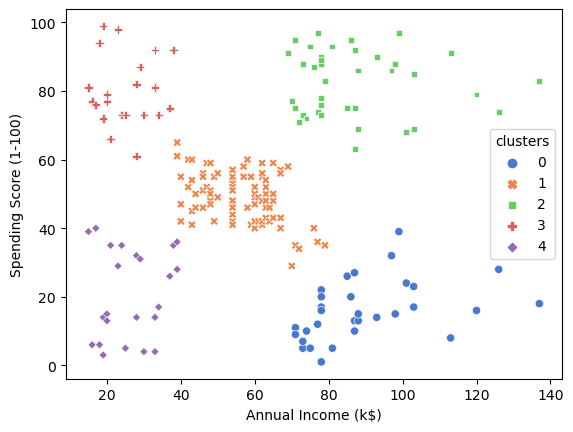

In [57]:
sns.scatterplot(x ="Annual Income (k$)", y = "Spending Score (1-100)", data = dataset, hue = "clusters", style = "clusters", palette = "muted" )

In [61]:
dataset[dataset["clusters"] == 2].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
